In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [187]:
dia = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\predictive modeling\project\cubic_zirconia.csv")

In [188]:
dia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [189]:
dia.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [190]:
## We can drop the Unnamed: 0 column as it it just a serial number

dia.drop(columns = ['Unnamed: 0'], inplace = True)

In [191]:
## renaming the columns x,y and z with l(length), b(bredth), h(height) respectively

dia.rename(columns = {'x' : 'l', 'y' : 'b', 'z' : 'h'}, inplace = True)
dia.head()

,carat,cut,color,clarity,depth,table,l,b,h,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [192]:
dia.shape

(26967, 10)

In [193]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   l        26967 non-null  float64
 7   b        26967 non-null  float64
 8   h        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [194]:
dia.describe()

,carat,depth,table,l,b,h,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [195]:
## there are some rows having l,b,h as 0

dia[dia['l'] == 0]

,carat,cut,color,clarity,depth,table,l,b,h,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [196]:
dia[dia['b'] == 0]

,carat,cut,color,clarity,depth,table,l,b,h,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [197]:
dia[dia['h'] == 0]

,carat,cut,color,clarity,depth,table,l,b,h,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [198]:
## The h feature has 9 values as 0, in which 3 values are common for all i.e. l,b,h.
## Percentage of 0 values in dataset is

(9 / dia.shape[0]) * 100

0.03337412392924686

In [199]:
## dropping the rows with l, b, h as 0 since they are dimensionless.
## I am dropping these rows because they are significantly very very less not even 0.5% of data.

dia = dia.drop(dia[dia["l"]==0].index)
dia = dia.drop(dia[dia["b"]==0].index)
dia = dia.drop(dia[dia["h"]==0].index)

In [200]:
dia.shape  # after dropping dimensionless rows

(26958, 10)

In [201]:
dups = dia.duplicated()
print("The total number of duplicates present in the dataset is ", dups.sum())

The total number of duplicates present in the dataset is  33


In [202]:
## no significatnt unique identifier for duplicates, so keeping it as it is in the dataset

In [203]:
dia.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
l            0
b            0
h            0
price        0
dtype: int64

In [204]:
# imputing null values for depth column with mean.

dia.fillna(value = dia['depth'].mean(), inplace = True)

In [205]:
## final shape after imputing and dropping significant features

dia.shape

(26958, 10)

In [206]:
dia.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
l          0
b          0
h          0
price      0
dtype: int64

#### Univariate Analysis for continous variable

In [207]:
## after treating anomalies and imputing null values
dia.describe()

,carat,depth,table,l,b,h,price
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.745345,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,1.394016,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


carat
SKEW :  1.12


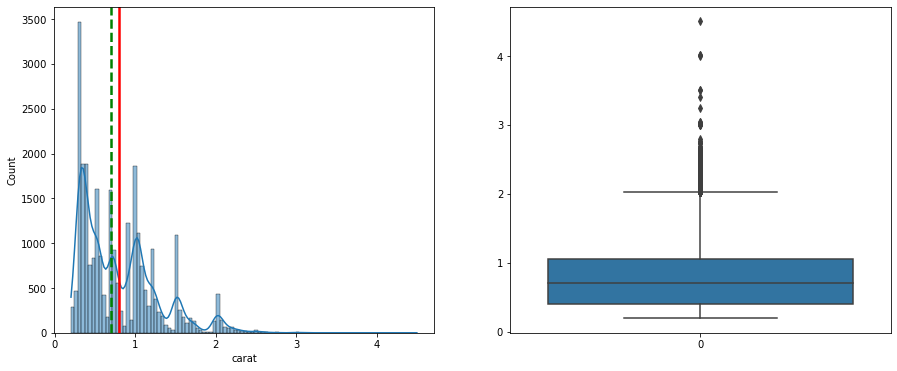

depth
SKEW :  -0.03


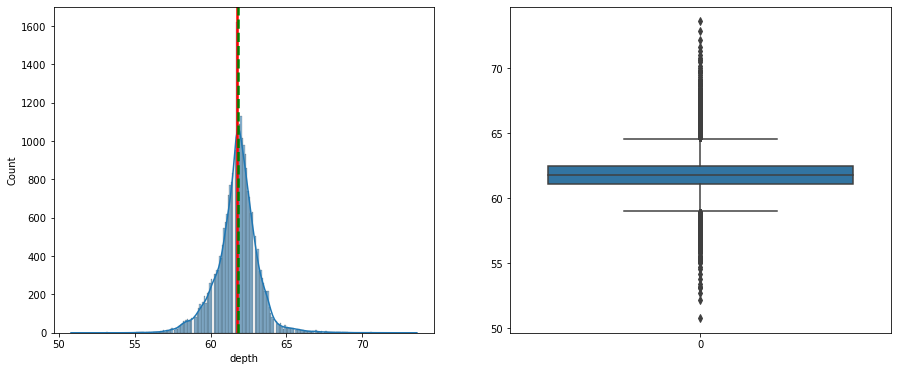

table
SKEW :  0.76


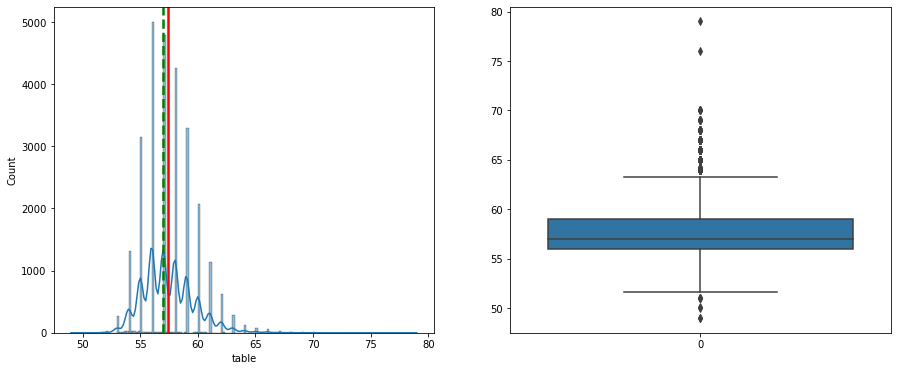

l
SKEW :  0.4


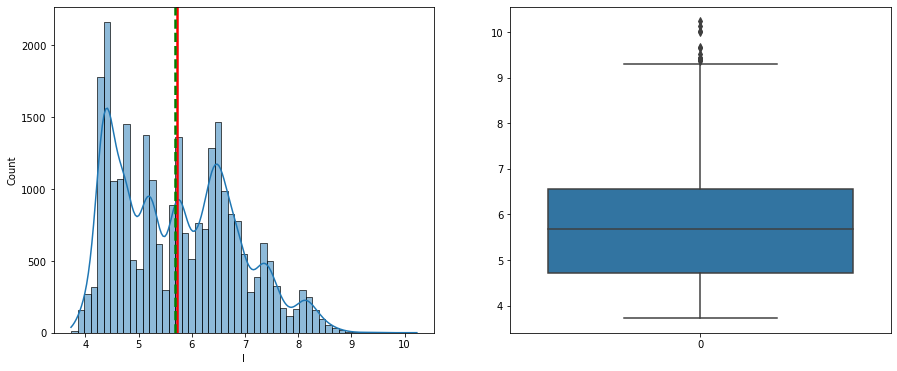

b
SKEW :  3.88


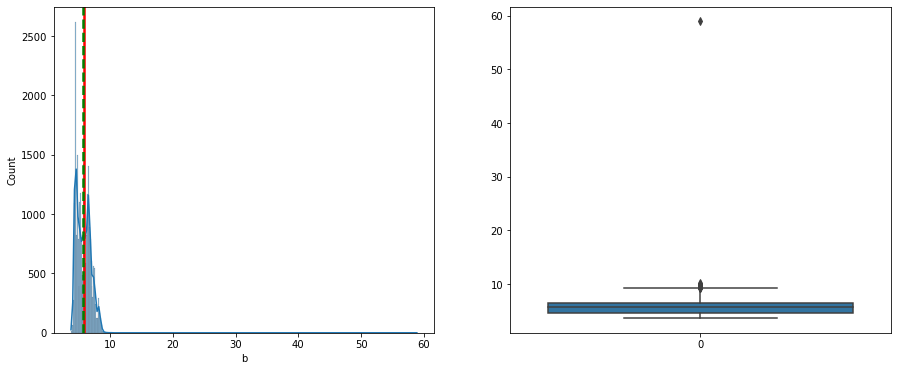

h
SKEW :  2.63


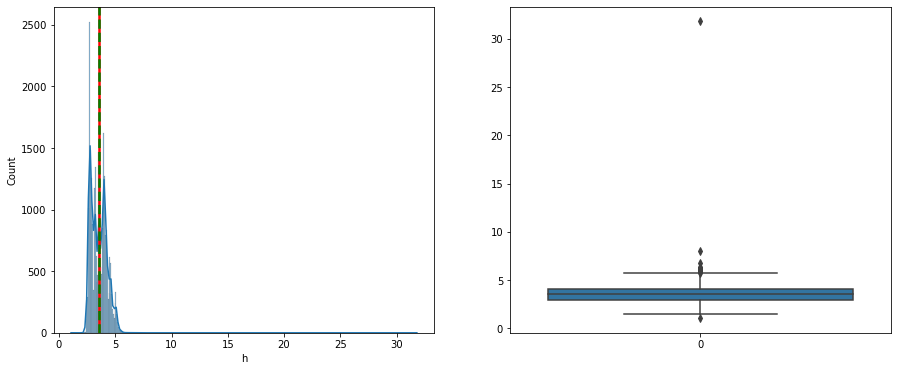

price
SKEW :  1.62


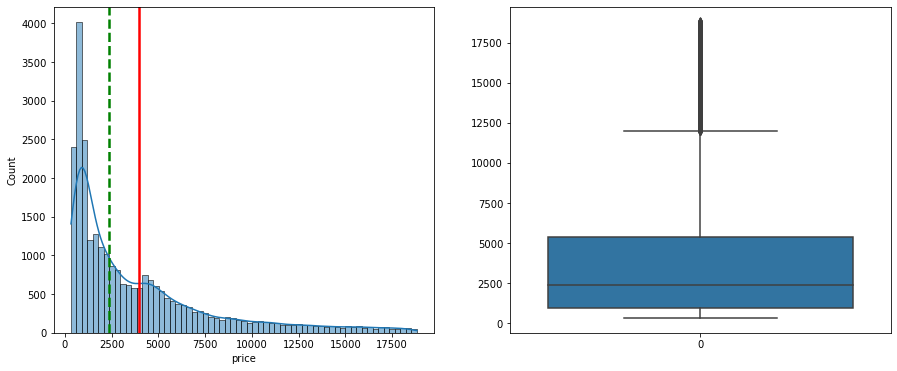

In [208]:
cols = ['carat', 'depth', 'table', 'l', 'b', 'h', 'price']
for col in cols:
    plt.figure(figsize=(15,6))
    print(col)
    plt.subplot(121)
    print("SKEW : ", np.round(dia[col].skew(), 2))
    sns.histplot(dia[col], kde = True)
    plt.axvline(dia[col].mean(), ymin = 0, ymax = 1, color = 'red', linewidth = 2.5)
    plt.axvline(dia[col].median(), ymin = 0, ymax = 1, color = 'green', linestyle = '--', linewidth = 2.5)
    plt.subplot(122)
    sns.boxplot(data = dia[col])
    plt.show()

In [209]:
kurt = dia.kurtosis()
k = pd.DataFrame(kurt)
kur = k.rename(columns = {0:'Kurtosis'})
kur

,Kurtosis
carat,1.216598
depth,3.857073
table,1.578214
l,-0.720047
b,160.233419
h,88.227812
price,2.148840


In [210]:
skew = dia.skew()
s = pd.DataFrame(skew)
ske = s.rename(columns = {0:"Skew"})
ske

,Skew
carat,1.116530
depth,-0.027934
table,0.764957
l,0.402531
b,3.879939
h,2.634182
price,1.618432


In [211]:
d_f = kur.join(ske, how = 'outer')
d_f

,Kurtosis,Skew
carat,1.216598,1.116530
depth,3.857073,-0.027934
table,1.578214,0.764957
l,-0.720047,0.402531
b,160.233419,3.879939
h,88.227812,2.634182
price,2.148840,1.618432


### Bi-variate analysis

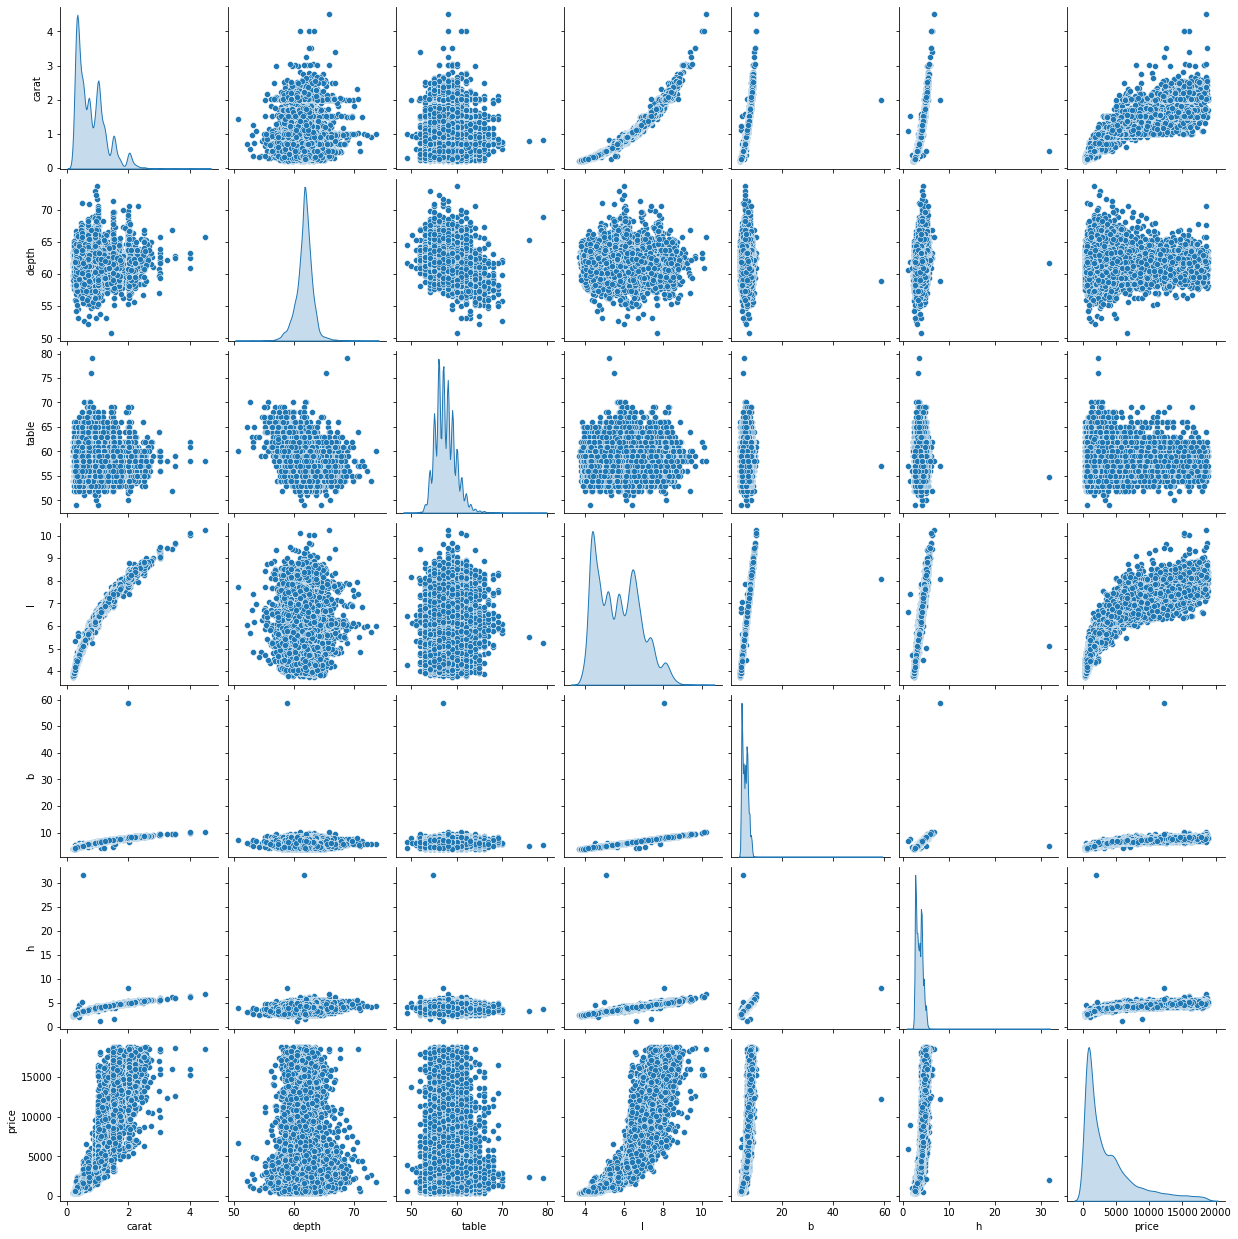

In [212]:
sns.pairplot(data = dia, diag_kind = 'kde')

<AxesSubplot:>

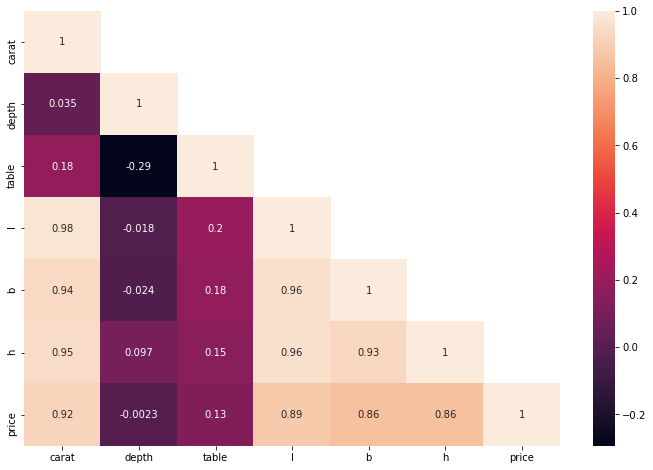

In [213]:
plt.figure(figsize=(12,8))
sns.heatmap(dia.corr(), annot = True, mask = np.triu(dia.corr(), +1))

## Univariate analysis for categorical features

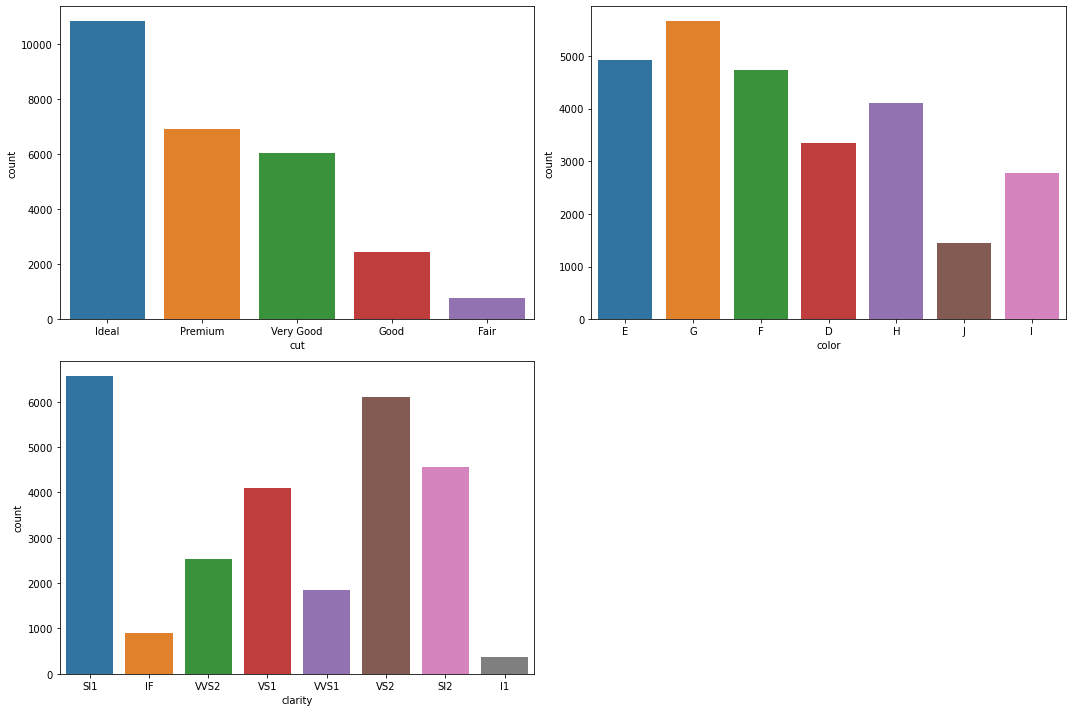

In [214]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(dia['cut'])

plt.subplot(222)
sns.countplot(dia['color'])

plt.subplot(223)
sns.countplot(dia['clarity'])

plt.tight_layout()
plt.show()


## Bi-variate analysis for categorical features

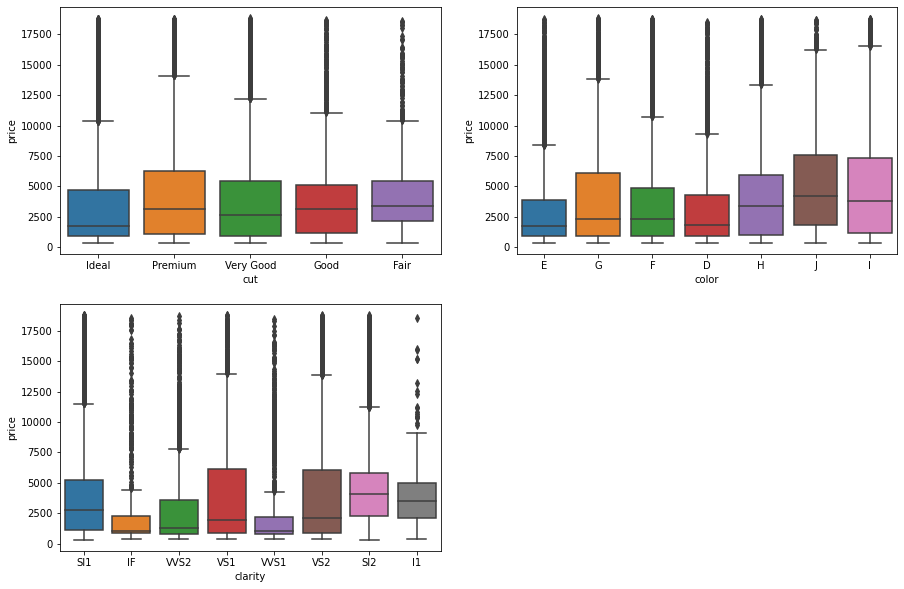

In [215]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x = dia['cut'], y = dia['price'])

plt.subplot(2,2,2)
sns.boxplot(x = dia['color'], y = dia['price'])

plt.subplot(2,2,3)
sns.boxplot(x = dia['clarity'], y = dia['price'])

plt.show()

In [216]:
## Outlier treatment:

def treat_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [217]:
## treating outliers

for column in dia[cols].columns:
    lr, ur = treat_outlier(dia[column])
    dia[column] = np.where(dia[column] > ur, ur, dia[column])
    dia[column] = np.where(dia[column] < lr, lr, dia[column])

carat


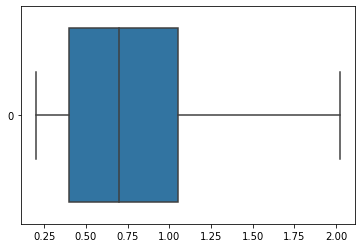

depth


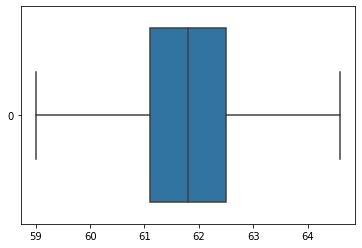

table


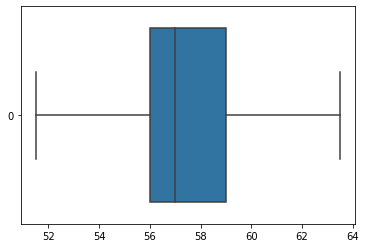

l


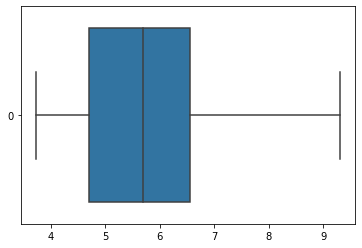

b


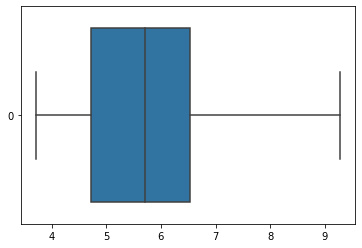

h


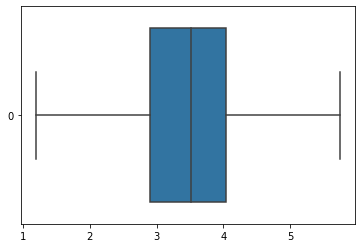

price


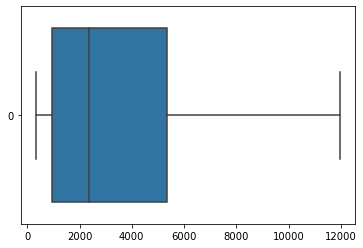

In [218]:
for col in cols:
    print(col)
    sns.boxplot(data = dia[col], orient = 'horizontal')
    plt.show()

In [219]:
dia_copy = dia.copy()

In [220]:
## Encoded in increasing order

dia['cut'] = np.where(dia['cut'] =='Fair', '1', dia['cut'])
dia['cut'] = np.where(dia['cut'] =='Good', '2', dia['cut'])
dia['cut'] = np.where(dia['cut'] =='Very Good', '3', dia['cut'])
dia['cut'] = np.where(dia['cut'] =='Premium', '4', dia['cut'])
dia['cut'] = np.where(dia['cut'] =='Ideal', '5', dia['cut'])

In [221]:
## Encoded from best to worst, i.e. best as 1 and worst as 7

dia['color'] = np.where(dia['color'] =='D', '1', dia['color'])
dia['color'] = np.where(dia['color'] =='E', '2', dia['color'])
dia['color'] = np.where(dia['color'] =='F', '3', dia['color'])
dia['color'] = np.where(dia['color'] =='G', '4', dia['color'])
dia['color'] = np.where(dia['color'] =='H', '5', dia['color'])
dia['color'] = np.where(dia['color'] =='I', '6', dia['color'])
dia['color'] = np.where(dia['color'] =='J', '7', dia['color'])

In [222]:
## Encoded from best to worst i.e., best as 1 and worst as 8


dia['clarity'] = np.where(dia['clarity'] =='IF', '1', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='VVS1', '2', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='VVS2', '3', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='VS1', '4', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='VS2', '5', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='SI1', '6', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='SI2', '7', dia['clarity'])
dia['clarity'] = np.where(dia['clarity'] =='I1', '8', dia['clarity'])

In [223]:
dia.head()

,carat,cut,color,clarity,depth,table,l,b,h,price
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779.0


In [224]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [225]:
## converting cut, color and clarity to numeric data type

dia['cut'] = dia['cut'].astype('int64')
dia['color'] = dia['color'].astype('int64')
dia['clarity'] = dia['clarity'].astype('int64')
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int64  
 2   color    26958 non-null  int64  
 3   clarity  26958 non-null  int64  
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.3 MB


In [226]:
model_name = []
model_pref = []

In [227]:
import statsmodels.formula.api as SM

## Model 1: Building model on all independent variables.

In [228]:
model_1 = SM.ols('price~carat+cut+color+clarity+depth+table+l+b+h', data = dia).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.060e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:15   Log-Likelihood:            -2.2191e+05
No. Observations:               26958   AIC:                         4.438e+05
Df Residuals:                   26948   BIC:                         4.439e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -562.5052    685.361     -0.821      0.412   -1905.847     780.837
carat       8824.9375     68.710    128.438      0.000    8690.263    8959.612
cut          109.6044      6.114     17.928      0.000      97.621     121.587
color       -274.0975      3.436    -79.780      0.000    -280.832    -267.363
clarity     -435.7516      3.748   -116.257      0.000    -443.098    -428.405
depth         46.0357      9.600      4.795      0.000      27.219      64.853
table        -12.8614      3.267     -3.936      0.000     -19.266      -6.457
l          -1163.0186    100.563    -11.565      0.000   -1360.127    -965.910
b           1503.8407     98.999     15.190      0.000    1309.798    1697.884
h          -1143.8787    122.029     -9.374      0.000   -1383.061    -904.696
==============================================================================
Omnibus:                     3698.111   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14775.062
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       6.391   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = "y~x", data = x_vars).fit().rsquared  
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

In [230]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table", "l", "b", "h"]])

carat  VIF =  32.89
cut  VIF =  1.51
color  VIF =  1.12
clarity  VIF =  1.24
depth  VIF =  4.46
table  VIF =  1.62
l  VIF =  418.01
b  VIF =  399.34
h  VIF =  235.16


In [231]:
model_name.append('Model_1')
model_pref.append(model_1.rsquared_adj)

### Model 1_a: Dropping the variable l, having highest VIF value.

In [232]:
model_1_a = SM.ols('price~carat+cut+color+clarity+depth+table+b+h', data = dia).fit()
model_1_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.543e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:16   Log-Likelihood:            -2.2197e+05
No. Observations:               26958   AIC:                         4.440e+05
Df Residuals:                   26949   BIC:                         4.440e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2278.6045    670.750     -3.397      0.001   -3593.310    -963.899
carat       8684.0032     67.787    128.108      0.000    8551.138    8816.869
cut          103.2778      6.104     16.920      0.000      91.314     115.242
color       -274.3123      3.444    -79.648      0.000    -281.063    -267.562
clarity     -440.5234      3.735   -117.959      0.000    -447.843    -433.203
depth         76.2679      9.260      8.236      0.000      58.117      94.418
table        -18.1230      3.243     -5.588      0.000     -24.480     -11.766
b            709.7890     71.496      9.928      0.000     569.653     849.925
h          -1652.6975    114.101    -14.484      0.000   -1876.342   -1429.053
==============================================================================
Omnibus:                     3617.834   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14672.988
Skew:                           0.623   Prob(JB):                         0.00
Kurtosis:                       6.393   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table", "b", "h"]])

carat  VIF =  31.85
cut  VIF =  1.5
color  VIF =  1.12
clarity  VIF =  1.23
depth  VIF =  4.13
table  VIF =  1.59
b  VIF =  207.26
h  VIF =  204.59


In [234]:
model_name.append('Model_1_a')
model_pref.append(model_1_a.rsquared_adj)

### Model 1_b: Dropping the variable b, having highest VIF value.

In [235]:
model_1_b = SM.ols('price~carat+cut+color+clarity+depth+table+h', data = dia).fit()
model_1_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.172e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:16   Log-Likelihood:            -2.2202e+05
No. Observations:               26958   AIC:                         4.441e+05
Df Residuals:                   26950   BIC:                         4.441e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2652.4048    451.593      5.873      0.000    1767.260    3537.550
carat       8833.8093     66.205    133.430      0.000    8704.043    8963.575
cut          100.9480      6.111     16.520      0.000      88.971     112.925
color       -274.6717      3.450    -79.613      0.000    -281.434    -267.909
clarity     -440.4435      3.741   -117.725      0.000    -447.777    -433.110
depth          1.9784      5.465      0.362      0.717      -8.733      12.689
table        -19.5014      3.246     -6.007      0.000     -25.864     -13.138
h           -608.3296     44.267    -13.742      0.000    -695.096    -521.563
==============================================================================
Omnibus:                     3605.573   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15295.079
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                       6.485   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table", "h"]])

carat  VIF =  30.27
cut  VIF =  1.5
color  VIF =  1.12
clarity  VIF =  1.23
depth  VIF =  1.43
table  VIF =  1.58
h  VIF =  30.68


In [237]:
model_name.append('Model_1_b')
model_pref.append(model_1_b.rsquared_adj)

### Model_1_c: Dropping h having highest VIF value 

In [238]:
model_1_c = SM.ols('price~carat+cut+color+clarity+table+depth', data = dia).fit()
model_1_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.989e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:17   Log-Likelihood:            -2.2212e+05
No. Observations:               26958   AIC:                         4.442e+05
Df Residuals:                   26951   BIC:                         4.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2386.4069    452.747      5.271      0.000    1498.999    3273.815
carat       7943.7997     13.783    576.351      0.000    7916.784    7970.815
cut          103.2210      6.130     16.840      0.000      91.207     115.235
color       -272.8631      3.460    -78.872      0.000    -279.644    -266.082
clarity     -448.2289      3.711   -120.783      0.000    -455.503    -440.955
table        -17.2892      3.254     -5.314      0.000     -23.667     -10.912
depth        -18.8172      5.269     -3.571      0.000     -29.145      -8.489
==============================================================================
Omnibus:                     3351.936   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11889.202
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                       6.014   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table"]])

carat  VIF =  1.3
cut  VIF =  1.49
color  VIF =  1.12
clarity  VIF =  1.2
depth  VIF =  1.32
table  VIF =  1.58


In [240]:
model_name.append('Model_1_c')
model_pref.append(model_1_c.rsquared_adj)

In [241]:
model_eval_1 = pd.DataFrame({'model_name': model_name, 'model_perf': model_pref})
model_eval_1

,model_name,model_perf
0,Model_1,0.931292
1,Model_1_a,0.930954
2,Model_1_b,0.930704
3,Model_1_c,0.930221


In [242]:
## Final Model selected is Model_1_c because the p-value and VIF both are in limits

## Model 2: Creating additional variable "Volume" by combining l,b and h and buliding model using all Variables excluding l,b,h.

In [243]:
dia['volume'] = dia['l'] * dia['b'] * dia['h']
dia.head()

,carat,cut,color,clarity,depth,table,l,b,h,price,volume
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499.0,48.726678
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984.0,53.225640
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289.0,139.726944
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082.0,68.482560
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779.0,51.066825


In [244]:
model_2 = SM.ols('price~carat+cut+color+clarity+depth+table+volume', data = dia).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.134e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:17   Log-Likelihood:            -2.2212e+05
No. Observations:               26958   AIC:                         4.442e+05
Df Residuals:                   26950   BIC:                         4.443e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2462.8338    458.968      5.366      0.000    1563.232    3362.435
carat       8069.5413    124.673     64.726      0.000    7825.177    8313.906
cut          103.4452      6.134     16.865      0.000      91.423     115.467
color       -272.7259      3.462    -78.772      0.000    -279.512    -265.940
clarity     -448.1897      3.711   -120.766      0.000    -455.464    -440.916
depth        -19.7104      5.342     -3.690      0.000     -30.182      -9.239
table        -17.7100      3.280     -5.399      0.000     -24.139     -11.281
volume        -0.7580      0.747     -1.015      0.310      -2.222       0.706
==============================================================================
Omnibus:                     3340.029   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11870.211
Skew:                           0.610   Prob(JB):                         0.00
Kurtosis:                       6.013   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table", "volume"]])

carat  VIF =  106.61
cut  VIF =  1.5
color  VIF =  1.12
clarity  VIF =  1.2
depth  VIF =  1.36
table  VIF =  1.61
volume  VIF =  105.84


In [246]:
model_name.append('Model_2- volume')
model_pref.append(model_2.rsquared_adj)

### Model 2_a: Dropping Volume as it is having high VIF and p-value and rebuilding the model

In [247]:
model_2_a = SM.ols('price~carat+cut+color+clarity+depth+table', data = dia).fit()
model_2_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.989e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:18   Log-Likelihood:            -2.2212e+05
No. Observations:               26958   AIC:                         4.442e+05
Df Residuals:                   26951   BIC:                         4.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2386.4069    452.747      5.271      0.000    1498.999    3273.815
carat       7943.7997     13.783    576.351      0.000    7916.784    7970.815
cut          103.2210      6.130     16.840      0.000      91.207     115.235
color       -272.8631      3.460    -78.872      0.000    -279.644    -266.082
clarity     -448.2289      3.711   -120.783      0.000    -455.503    -440.955
depth        -18.8172      5.269     -3.571      0.000     -29.145      -8.489
table        -17.2892      3.254     -5.314      0.000     -23.667     -10.912
==============================================================================
Omnibus:                     3351.936   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11889.202
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                       6.014   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
vif_cal(input_data = dia[["carat", "cut", "color", "clarity","depth", "table"]])

carat  VIF =  1.3
cut  VIF =  1.49
color  VIF =  1.12
clarity  VIF =  1.2
depth  VIF =  1.32
table  VIF =  1.58


In [249]:
model_name.append('Model_2_a')
model_pref.append(model_2_a.rsquared_adj)

In [250]:
## Final model to be kept is Model_2_a as all are in limits

## Both model_1_c and model_2_a are exactly same so we can keep either of the two model.

## Model 3: Combining sub-levels of attributes in one bucket and building model

In [251]:
dia_copy.head()

,carat,cut,color,clarity,depth,table,l,b,h,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [252]:
## Encoded in increasing order and combined two attributes in one bucket

dia_copy['cut'] = np.where(dia_copy['cut'] =='Fair', '1', dia_copy['cut'])
dia_copy['cut'] = np.where(dia_copy['cut'] =='Good', '2', dia_copy['cut'])
dia_copy['cut'] = np.where(dia_copy['cut'] =='Very Good', '2', dia_copy['cut'])
dia_copy['cut'] = np.where(dia_copy['cut'] =='Premium', '3', dia_copy['cut'])
dia_copy['cut'] = np.where(dia_copy['cut'] =='Ideal', '3', dia_copy['cut'])

In [253]:
## Encoded from best to worst, i.e. best as 1 and worst as 7

dia_copy['color'] = np.where(dia_copy['color'] =='D', '1', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='E', '2', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='F', '3', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='G', '4', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='H', '5', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='I', '6', dia_copy['color'])
dia_copy['color'] = np.where(dia_copy['color'] =='J', '7', dia_copy['color'])

In [254]:
## Encoded from best to worst i.e., best as 1 and worst as 5 and combined certain groups in one bucket


dia_copy['clarity'] = np.where(dia_copy['clarity'] =='IF', '1', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='VVS1', '2', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='VVS2', '2', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='VS1', '3', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='VS2', '3', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='SI1', '4', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='SI2', '4', dia_copy['clarity'])
dia_copy['clarity'] = np.where(dia_copy['clarity'] =='I1', '5', dia_copy['clarity'])

In [255]:
dia['clarity'].unique()

array([6, 1, 3, 4, 2, 5, 7, 8], dtype=int64)

In [256]:
dia_copy['clarity'].unique()

array(['4', '1', '2', '3', '5'], dtype=object)

In [257]:
dia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [258]:
## converting cut, color and clarity to numeric data type

dia_copy['cut'] = dia_copy['cut'].astype('int64')
dia_copy['color'] = dia_copy['color'].astype('int64')
dia_copy['clarity'] = dia_copy['clarity'].astype('int64')
dia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int64  
 2   color    26958 non-null  int64  
 3   clarity  26958 non-null  int64  
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.3 MB


In [259]:
## Building model with all variables after bucketing certain attributes.

model_3 = SM.ols('price~carat+cut+color+clarity+depth+table+l+b+h', data = dia_copy).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.845e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:19   Log-Likelihood:            -2.2259e+05
No. Observations:               26958   AIC:                         4.452e+05
Df Residuals:                   26948   BIC:                         4.453e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    624.4029    688.404      0.907      0.364    -724.905    1973.711
carat       8799.1527     70.532    124.754      0.000    8660.906    8937.399
cut          219.3035     11.998     18.278      0.000     195.787     242.820
color       -263.2473      3.515    -74.901      0.000    -270.136    -256.359
clarity     -795.9652      7.374   -107.943      0.000    -810.419    -781.512
depth         42.9327      9.803      4.380      0.000      23.719      62.147
table        -23.8333      3.081     -7.737      0.000     -29.871     -17.795
l          -1456.8432    104.352    -13.961      0.000   -1661.379   -1252.307
b           1759.7490    102.622     17.148      0.000    1558.604    1960.894
h          -1119.4984    125.180     -8.943      0.000   -1364.857    -874.140
==============================================================================
Omnibus:                     3855.926   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13731.541
Skew:                           0.706   Prob(JB):                         0.00
Kurtosis:                       6.199   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
vif_cal(input_data = dia_copy[["carat", "cut", "color", "clarity","depth", "table", "l", "b", "h"]])

carat  VIF =  32.94
cut  VIF =  1.3
color  VIF =  1.11
clarity  VIF =  1.21
depth  VIF =  4.42
table  VIF =  1.37
l  VIF =  427.86
b  VIF =  407.9
h  VIF =  235.23


In [261]:
model_name.append('Model_3-combined sub-levels')
model_pref.append(model_3.rsquared_adj)

### Model 3_a: Dropping l, b and h having highest VIF

In [262]:
model_3_a = SM.ols('price~carat+cut+color+clarity+depth+table', data = dia_copy).fit()
model_3_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 5.655e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:20   Log-Likelihood:            -2.2284e+05
No. Observations:               26958   AIC:                         4.457e+05
Df Residuals:                   26951   BIC:                         4.457e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3782.8893    442.184      8.555      0.000    2916.186    4649.593
carat       7858.8781     13.995    561.557      0.000    7831.448    7886.309
cut          186.8219     11.881     15.725      0.000     163.535     210.109
color       -261.6623      3.544    -73.842      0.000    -268.608    -254.717
clarity     -822.5868      7.309   -112.544      0.000    -836.913    -808.261
depth        -23.3750      5.339     -4.378      0.000     -33.841     -12.909
table        -30.3575      3.058     -9.929      0.000     -36.351     -24.365
==============================================================================
Omnibus:                     3455.629   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10983.936
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       5.830   Cond. No.                     6.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
vif_cal(input_data = dia_copy[["carat", "cut", "color", "clarity","depth", "table"]])

carat  VIF =  1.27
cut  VIF =  1.25
color  VIF =  1.11
clarity  VIF =  1.17
depth  VIF =  1.29
table  VIF =  1.32


In [264]:
model_name.append('Model 3_a')
model_pref.append(model_3_a.rsquared_adj)

In [265]:
## Final Model: Model_3_a as p-value and VIF are in permissible limits

## Model 4: Combining sub-levels in one bucket and making dummy variables.

In [266]:
dia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int64  
 2   color    26958 non-null  int64  
 3   clarity  26958 non-null  int64  
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.3 MB


In [267]:
## converting cut, color and clarity to object data type

dia_copy['cut'] = dia_copy['cut'].astype('object')
dia_copy['color'] = dia_copy['color'].astype('object')
dia_copy['clarity'] = dia_copy['clarity'].astype('object')
dia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [268]:
dia_copy['volume'] = dia_copy['l'] * dia_copy['b'] * dia_copy['h']

In [269]:
dia_1 = dia_copy.drop(columns = ['l', 'b', 'h'])
dia_1.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.30,3,2,4,62.1,58.0,499.0,48.726678
1,0.33,3,4,1,60.8,58.0,984.0,53.225640
2,0.90,2,2,2,62.2,60.0,6289.0,139.726944
3,0.42,3,3,3,61.6,56.0,1082.0,68.482560
4,0.31,3,3,2,60.4,59.0,779.0,51.066825


In [270]:
dummy_dia_1 = pd.get_dummies(data = dia_1, drop_first = True)
dummy_dia_1.head()

,carat,depth,table,price,volume,cut_2,cut_3,color_2,color_3,color_4,color_5,color_6,color_7,clarity_2,clarity_3,clarity_4,clarity_5
0,0.30,62.1,58.0,499.0,48.726678,0,1,1,0,0,0,0,0,0,0,1,0
1,0.33,60.8,58.0,984.0,53.225640,0,1,0,0,1,0,0,0,0,0,0,0
2,0.90,62.2,60.0,6289.0,139.726944,1,0,1,0,0,0,0,0,1,0,0,0
3,0.42,61.6,56.0,1082.0,68.482560,0,1,0,1,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,779.0,51.066825,0,1,0,1,0,0,0,0,1,0,0,0


In [271]:
model_4 = SM.ols('price~carat+depth+table+volume+cut_2+cut_3+color_2+color_3+color_4+color_5+color_6+color_7+clarity_2+clarity_3+clarity_4+clarity_5', data = dummy_dia_1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.367e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:21   Log-Likelihood:            -2.2146e+05
No. Observations:               26958   AIC:                         4.429e+05
Df Residuals:                   26941   BIC:                         4.431e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    928.2216    426.551      2.176      0.030      92.159    1764.284
carat       7650.0838    122.162     62.622      0.000    7410.640    7889.528
depth        -11.8454      5.168     -2.292      0.022     -21.975      -1.716
table        -29.9198      2.938    -10.182      0.000     -35.679     -24.160
volume         1.5234      0.732      2.081      0.037       0.088       2.958
cut_2        624.2164     34.689     17.994      0.000     556.223     692.210
cut_3        700.7307     35.192     19.912      0.000     631.753     769.708
color_2     -201.6530     20.088    -10.038      0.000    -241.027    -162.279
color_3     -253.4454     20.336    -12.463      0.000    -293.305    -213.586
color_4     -409.0228     19.828    -20.628      0.000    -447.887    -370.159
color_5     -819.5347     21.165    -38.721      0.000    -861.020    -778.050
color_6    -1250.4093     23.557    -53.081      0.000   -1296.582   -1204.237
color_7    -1822.8921     28.959    -62.946      0.000   -1879.654   -1766.130
clarity_2   -221.6231     32.963     -6.723      0.000    -286.232    -157.015
clarity_3   -823.3429     31.607    -26.049      0.000    -885.295    -761.391
clarity_4  -1802.9070     32.058    -56.238      0.000   -1865.743   -1740.071
clarity_5  -4123.8329     57.216    -72.075      0.000   -4235.980   -4011.686
==============================================================================
Omnibus:                     5512.095   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16132.910
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       6.126   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
vif_cal(input_data = dummy_dia_1[['carat', 'depth', 'table', 'volume', 'cut_2', 'cut_3', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5']])

carat  VIF =  107.47
depth  VIF =  1.34
table  VIF =  1.35
volume  VIF =  106.74
cut_2  VIF =  8.74
cut_3  VIF =  9.41
color_2  VIF =  2.03
color_3  VIF =  2.01
color_4  VIF =  2.2
color_5  VIF =  1.95
color_6  VIF =  1.72
color_7  VIF =  1.43
clarity_2  VIF =  4.97
clarity_3  VIF =  7.91
clarity_4  VIF =  8.4
clarity_5  VIF =  1.47


In [273]:
model_name.append('Model 4-combined sub-levels using dummy')
model_pref.append(model_4.rsquared_adj)

## Model_4_a: Dropping volume, highest VIF variable and rebuilding the model

In [274]:
model_4_a = SM.ols('price~carat+depth+table+cut_2+cut_3+color_2+color_3+color_4+color_5+color_6+color_7+clarity_2+clarity_3+clarity_4+clarity_5', data = dummy_dia_1).fit()
model_4_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.524e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:23   Log-Likelihood:            -2.2146e+05
No. Observations:               26958   AIC:                         4.429e+05
Df Residuals:                   26942   BIC:                         4.431e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1084.5083    419.913      2.583      0.010     261.457    1907.560
carat       7902.7694     13.344    592.242      0.000    7876.615    7928.924
depth        -13.6342      5.096     -2.675      0.007     -23.623      -3.645
table        -30.8129      2.907    -10.599      0.000     -36.511     -25.115
cut_2        627.3846     34.658     18.102      0.000     559.453     695.316
cut_3        704.4508     35.148     20.042      0.000     635.558     773.344
color_2     -201.6810     20.090    -10.039      0.000    -241.058    -162.304
color_3     -253.8325     20.336    -12.482      0.000    -293.692    -213.973
color_4     -409.4097     19.828    -20.648      0.000    -448.274    -370.545
color_5     -819.4505     21.166    -38.715      0.000    -860.938    -777.963
color_6    -1249.5657     23.555    -53.050      0.000   -1295.734   -1203.397
color_7    -1819.8425     28.924    -62.918      0.000   -1876.535   -1763.150
clarity_2   -221.8756     32.964     -6.731      0.000    -286.488    -157.264
clarity_3   -824.5366     31.604    -26.089      0.000    -886.483    -762.591
clarity_4  -1803.7171     32.058    -56.264      0.000   -1866.553   -1740.882
clarity_5  -4118.2143     57.156    -72.052      0.000   -4230.243   -4006.186
==============================================================================
Omnibus:                     5483.669   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16063.580
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       6.124   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
vif_cal(input_data = dummy_dia_1[['carat', 'depth', 'table', 'cut_2', 'cut_3', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5']])

carat  VIF =  1.28
depth  VIF =  1.3
table  VIF =  1.32
cut_2  VIF =  8.72
cut_3  VIF =  9.38
color_2  VIF =  2.03
color_3  VIF =  2.01
color_4  VIF =  2.2
color_5  VIF =  1.95
color_6  VIF =  1.72
color_7  VIF =  1.43
clarity_2  VIF =  4.97
clarity_3  VIF =  7.91
clarity_4  VIF =  8.4
clarity_5  VIF =  1.46


In [276]:
model_name.append('Model 4_a')
model_pref.append(model_4_a.rsquared_adj)

## Model_4_b: Dropping attribute cut_3, highest VIF

In [277]:
model_4_b = SM.ols('price~carat+depth+table+cut_2+color_2+color_3+color_4+color_5+color_6+color_7+clarity_2+clarity_3+clarity_4+clarity_5', data = dummy_dia_1).fit()
model_4_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.662e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:24   Log-Likelihood:            -2.2166e+05
No. Observations:               26958   AIC:                         4.433e+05
Df Residuals:                   26943   BIC:                         4.435e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4410.4977    388.588     11.350      0.000    3648.846    5172.150
carat       7894.9186     13.437    587.555      0.000    7868.582    7921.256
depth        -44.4798      4.894     -9.088      0.000     -54.073     -34.886
table        -43.7724      2.855    -15.330      0.000     -49.369     -38.176
cut_2        -21.0218     12.523     -1.679      0.093     -45.567       3.524
color_2     -201.4733     20.238     -9.955      0.000    -241.142    -161.805
color_3     -260.1700     20.484    -12.701      0.000    -300.320    -220.020
color_4     -409.6445     19.975    -20.508      0.000    -448.797    -370.492
color_5     -821.2075     21.323    -38.513      0.000    -863.002    -779.413
color_6    -1247.7798     23.729    -52.585      0.000   -1294.290   -1201.270
color_7    -1824.9867     29.137    -62.634      0.000   -1882.097   -1767.876
clarity_2   -221.0948     33.209     -6.658      0.000    -286.185    -156.004
clarity_3   -823.3712     31.838    -25.861      0.000    -885.776    -760.967
clarity_4  -1807.9026     32.295    -55.981      0.000   -1871.202   -1744.603
clarity_5  -4239.2090     57.257    -74.038      0.000   -4351.436   -4126.982
==============================================================================
Omnibus:                     5311.362   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15532.646
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       6.091   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [278]:
vif_cal(input_data = dummy_dia_1[['carat', 'depth', 'table', 'cut_2', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5']])

carat  VIF =  1.28
depth  VIF =  1.18
table  VIF =  1.26
cut_2  VIF =  1.12
color_2  VIF =  2.03
color_3  VIF =  2.01
color_4  VIF =  2.2
color_5  VIF =  1.95
color_6  VIF =  1.72
color_7  VIF =  1.43
clarity_2  VIF =  4.97
clarity_3  VIF =  7.91
clarity_4  VIF =  8.4
clarity_5  VIF =  1.45


In [279]:
model_name.append('Model 4_b')
model_pref.append(model_4_b.rsquared_adj)

### Model_4_c: Dropping attribute clarity_4.

In [280]:
model_4_c = SM.ols('price~carat+depth+table+cut_2+color_2+color_3+color_4+color_5+color_6+color_7+clarity_2+clarity_3+clarity_5', data = dummy_dia_1).fit()
model_4_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.546e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:25   Log-Likelihood:            -2.2314e+05
No. Observations:               26958   AIC:                         4.463e+05
Df Residuals:                   26944   BIC:                         4.464e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4604.9074    410.541     11.217      0.000    3800.225    5409.590
carat       7764.1885     13.981    555.357      0.000    7736.786    7791.591
depth        -61.7245      5.161    -11.960      0.000     -71.840     -51.609
table        -56.7248      3.007    -18.866      0.000     -62.618     -50.831
cut_2        -40.5865     13.226     -3.069      0.002     -66.510     -14.663
color_2     -174.1363     21.376     -8.146      0.000    -216.035    -132.237
color_3     -183.6003     21.594     -8.502      0.000    -225.926    -141.275
color_4     -280.4060     20.963    -13.376      0.000    -321.495    -239.317
color_5     -736.3689     22.472    -32.769      0.000    -780.415    -692.323
color_6    -1159.9514     25.016    -46.369      0.000   -1208.983   -1110.919
color_7    -1733.8250     30.736    -56.409      0.000   -1794.070   -1673.580
clarity_2   1387.0912     17.602     78.804      0.000    1352.591    1421.592
clarity_3    819.1193     13.062     62.712      0.000     793.518     844.721
clarity_5  -2518.0447     51.033    -49.341      0.000   -2618.073   -2418.017
==============================================================================
Omnibus:                     7373.980   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30990.541
Skew:                           1.295   Prob(JB):                         0.00
Kurtosis:                       7.570   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [281]:
vif_cal(input_data = dummy_dia_1[['carat', 'depth', 'table', 'cut_2', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_5']])

carat  VIF =  1.24
depth  VIF =  1.18
table  VIF =  1.25
cut_2  VIF =  1.12
color_2  VIF =  2.03
color_3  VIF =  2.01
color_4  VIF =  2.17
color_5  VIF =  1.94
color_6  VIF =  1.72
color_7  VIF =  1.42
clarity_2  VIF =  1.25
clarity_3  VIF =  1.19
clarity_5  VIF =  1.03


In [282]:
model_name.append('Model 4_c')
model_pref.append(model_4_c.rsquared_adj)

### Model_4_d: Dropping attribute color_4

In [283]:
model_4_d = SM.ols('price~carat+depth+table+color_2+color_3+color_5+color_6+color_7+clarity_2+clarity_3+clarity_5', data = dummy_dia_1).fit()
model_4_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 2.987e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:26   Log-Likelihood:            -2.2323e+05
No. Observations:               26958   AIC:                         4.465e+05
Df Residuals:                   26946   BIC:                         4.466e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4807.5284    393.921     12.204      0.000    4035.422    5579.635
carat       7746.6383     13.958    555.007      0.000    7719.280    7773.996
depth        -65.7832      5.033    -13.071      0.000     -75.648     -55.919
table        -58.7920      2.893    -20.324      0.000     -64.462     -53.122
color_2       -1.2294     16.987     -0.072      0.942     -34.524      32.066
color_3       -8.4347     17.164     -0.491      0.623     -42.078      25.208
color_5     -558.0593     18.160    -30.731      0.000    -593.653    -522.465
color_6     -979.7049     21.128    -46.371      0.000   -1021.116    -938.293
color_7    -1553.3085     27.663    -56.152      0.000   -1607.529   -1499.088
clarity_2   1362.1604     17.559     77.576      0.000    1327.744    1396.577
clarity_3    807.4284     13.063     61.809      0.000     781.824     833.033
clarity_5  -2520.3799     51.156    -49.268      0.000   -2620.649   -2420.111
==============================================================================
Omnibus:                     7494.750   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32712.832
Skew:                           1.304   Prob(JB):                         0.00
Kurtosis:                       7.724   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
vif_cal(input_data = dummy_dia_1[['carat', 'depth', 'table', 'color_2', 'color_3', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_5']])

carat  VIF =  1.23
depth  VIF =  1.11
table  VIF =  1.15
color_2  VIF =  1.27
color_3  VIF =  1.26
color_5  VIF =  1.26
color_6  VIF =  1.22
color_7  VIF =  1.15
clarity_2  VIF =  1.24
clarity_3  VIF =  1.19
clarity_5  VIF =  1.03


In [285]:
model_name.append('Model 4_d')
model_pref.append(model_4_d.rsquared_adj)

In [286]:
## Final model selected : Model_4_c as it is having permissible limits of VIf and p-value is also good.

In [287]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_pref})
model_eval

,model_name,model_perf
0,Model_1,0.931292
1,Model_1_a,0.930954
2,Model_1_b,0.930704
3,Model_1_c,0.930221
4,Model_2- volume,0.930221
5,Model_2_a,0.930221
6,Model_3-combined sub-levels,0.927721
7,Model 3_a,0.926393
8,Model 4-combined sub-levels using dummy,0.933537
9,Model 4_a,0.933529


In [288]:
# from sklearn import metrics
# metrics.mean_squared_error(dia['price'], model_1_c_pred, squared=False)

## Problem 1.3

In [329]:
from sklearn.linear_model import LinearRegression

In [330]:
lr = LinearRegression()

In [332]:
dia.head()

,carat,cut,color,clarity,depth,table,l,b,h,price,volume
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499.0,48.726678
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984.0,53.225640
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289.0,139.726944
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082.0,68.482560
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779.0,51.066825


In [333]:
X = dia.drop('price', axis=1)
Y = dia['price']

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### Using Model 1_c variables to build the model on the training data and predict on the training as well as test data.

In [336]:
model_1_c = lr.fit(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table']], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [338]:
#Training Data Prediction
model_1_c_pred_train = model_1_c.predict(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

In [340]:
#Test Data Prediction
model_1_c_pred_test = model_1_c.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

In [341]:
print('Training Data RMSE of model_1c:',metrics.mean_squared_error(Y_train,model_1_c_pred_train,squared=False))
print('Test Data RMSE of model_1c:',metrics.mean_squared_error(Y_test,model_1_c_pred_test,squared=False))

Training Data RMSE of model_1c: 903.8851945773193
Test Data RMSE of model_1c: 945.111290333485


### Using only Model 2_a variables to build the model on the training data and predict on the training as well as test data.

In [342]:
model_2_a = lr.fit(X_train[["carat", "cut", "color", "clarity","depth", "table"]], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [343]:
#Training Data Prediction
model_2_a_pred_train = model_2_a.predict(X_train[["carat", "cut", "color", "clarity","depth", "table"]])

In [344]:
#Test Data Prediction
model_2_a_pred_test = model_2_a.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

In [346]:
print('Training Data RMSE of model_2a:',metrics.mean_squared_error(Y_train,model_2_a_pred_train,squared=False))
print('Test Data RMSE of model_2a:    ',metrics.mean_squared_error(Y_test,model_2_a_pred_test,squared=False))

Training Data RMSE of model_2a: 903.8851945773193
Test Data RMSE of model_2a:     945.111290333485


### Using only Model 3_a variables to build the model on the training data and predict on the training as well as test data.

In [347]:
dia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int64  
 2   color    26958 non-null  int64  
 3   clarity  26958 non-null  int64  
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   l        26958 non-null  float64
 7   b        26958 non-null  float64
 8   h        26958 non-null  float64
 9   price    26958 non-null  float64
 10  volume   26958 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.5 MB


In [358]:
dia_copy['clarity'].unique()

array([4, 1, 2, 3, 5], dtype=int64)

In [364]:
X3 = dia_copy.drop('price', axis = 1)
Y3 = dia['price']

In [365]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=1)

In [366]:
model_3_a = lr.fit(X_train3[["carat", "cut", "color", "clarity","depth", "table"]], Y_train3)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [367]:
#Training Data Prediction
model_3_a_pred_train = model_3_a.predict(X_train3[["carat", "cut", "color", "clarity","depth", "table"]])

In [368]:
#Test Data Prediction
model_3_a_pred_test = model_3_a.predict(X_test3[["carat", "cut", "color", "clarity","depth", "table"]])

In [369]:
print('Training Data RMSE of model_3a:',metrics.mean_squared_error(Y_train3,model_3_a_pred_train,squared=False))
print('Test Data RMSE of model_3a:    ',metrics.mean_squared_error(Y_test3,model_3_a_pred_test,squared=False))

Training Data RMSE of model_3a: 930.2055162088428
Test Data RMSE of model_3a:     966.5677880278429


### Using only Model 4_c variables to build the model on the training data and predict on the training as well as test data.

In [370]:
dummy_dia_1.head()

,carat,depth,table,price,volume,cut_2,cut_3,color_2,color_3,color_4,color_5,color_6,color_7,clarity_2,clarity_3,clarity_4,clarity_5
0,0.30,62.1,58.0,499.0,48.726678,0,1,1,0,0,0,0,0,0,0,1,0
1,0.33,60.8,58.0,984.0,53.225640,0,1,0,0,1,0,0,0,0,0,0,0
2,0.90,62.2,60.0,6289.0,139.726944,1,0,1,0,0,0,0,0,1,0,0,0
3,0.42,61.6,56.0,1082.0,68.482560,0,1,0,1,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,779.0,51.066825,0,1,0,1,0,0,0,0,1,0,0,0


In [371]:
X4 = dummy_dia_1.drop('price', axis = 1)
Y4 = dummy_dia_1['price']

In [372]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=0.3, random_state=1)

In [373]:
model_4_c = lr.fit(X_train4[['carat', 'depth', 'table', 'cut_2', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_5']], Y_train4)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [374]:
#Training Data Prediction
model_4_c_pred_train = model_4_c.predict(X_train4[['carat', 'depth', 'table', 'cut_2', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_5']])

In [375]:
#Test Data Prediction
model_4_c_pred_test = model_4_c.predict(X_test4[['carat', 'depth', 'table', 'cut_2', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'clarity_2', 'clarity_3', 'clarity_5']])

In [376]:
print('Training Data RMSE of model_4c:',metrics.mean_squared_error(Y_train,model_4_c_pred_train,squared=False))
print('Test Data RMSE of model_4c:    ',metrics.mean_squared_error(Y_test4,model_4_c_pred_test,squared=False))

Training Data RMSE of model_4c: 945.0663903393221
Test Data RMSE of model_4c:     968.0310005863735


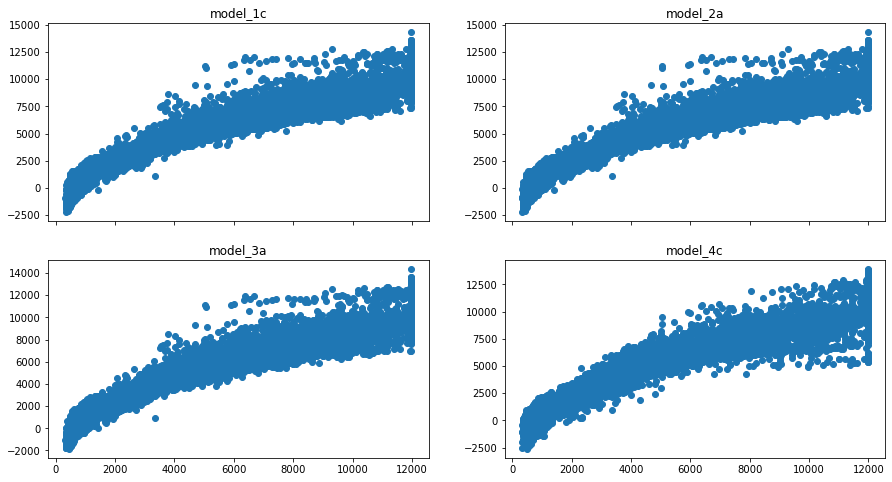

In [377]:
# Training Data
f,a =  plt.subplots(2,2,sharex=True, figsize=(15,8))
a[0][0].scatter(Y_train,model_1_c_pred_train)
a[0][0].set_title('model_1c')
a[0][1].scatter(Y_train,model_2_a_pred_train)
a[0][1].set_title('model_2a')
a[1][0].scatter(Y_train,model_3_a_pred_train)
a[1][0].set_title('model_3a')
a[1][1].scatter(Y_train,model_4_c_pred_train)
a[1][1].set_title('model_4c')
plt.show()

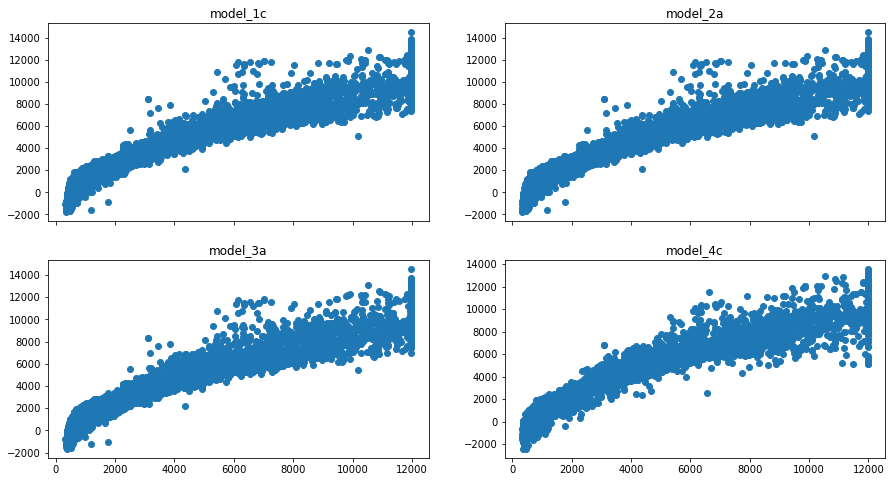

In [378]:
# Test Data
f,a =  plt.subplots(2,2,sharex=True, figsize=(15,8))
a[0][0].scatter(Y_test,model_1_c_pred_test)
a[0][0].set_title('model_1c')
a[0][1].scatter(Y_test,model_2_a_pred_test)
a[0][1].set_title('model_2a')
a[1][0].scatter(Y_test,model_3_a_pred_test)
a[1][0].set_title('model_3a')
a[1][1].scatter(Y_test,model_4_c_pred_test)
a[1][1].set_title('model_4c')
plt.show()